## Aula 01 - Entendendo Série Temporal
### Parte 1 - Coleta de Dados e Primeiras Análises

- Fonte dos dados: [Governo do Estado de São Paulo](https://www.seade.gov.br/coronavirus/)

In [1]:
src = "../../data/modulo_03/dados_covid_sp.zip"

In [2]:
import  pandas as pd

In [3]:
dados = pd.read_csv(src, sep=";")

In [4]:
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [5]:
dados["datahora"] = pd.to_datetime(dados["datahora"], format="%Y-%m-%d")

In [6]:
import matplotlib as mpl

In [7]:
mpl.rcParams["font.size"] = 12
mpl.rcParams["figure.figsize"] = (15,8)

In [8]:
import seaborn as sns

<AxesSubplot:xlabel='datahora', ylabel='casos'>

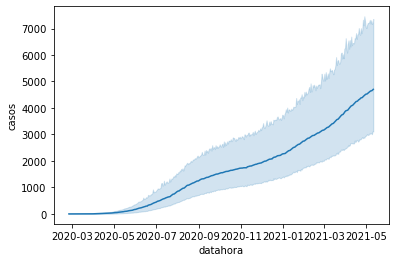

In [9]:
sns.lineplot(x="datahora", y="casos", data=dados)

#### Fórmula
$$ e^x $$

In [10]:
import numpy as np

In [11]:
eixo_x = np.linspace(-2,2,100)

In [12]:
y_exp = np.exp(eixo_x)

<AxesSubplot:>

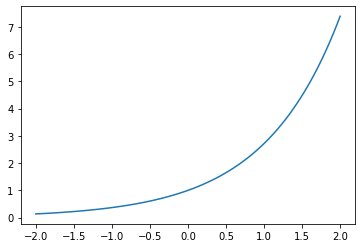

In [13]:
sns.lineplot(x=eixo_x, y=y_exp)

#### Fórmula

$$ log_2 2 = 1 $$
$$ log_2 2^x = x $$
$$ log_e e^x = x $$

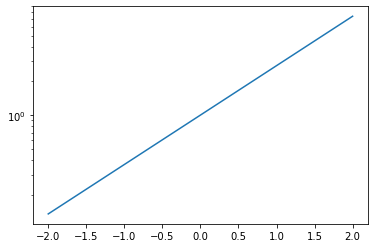

In [14]:
sns.lineplot(x=eixo_x, y=y_exp)
mpl.pyplot.yscale("log")

In [15]:
dados_sp = dados.query('nome_munic == "São Paulo"')

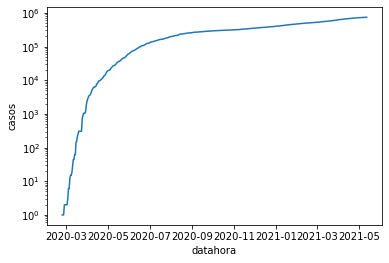

In [16]:
sns.lineplot(x="datahora",y="casos",data=dados_sp)
mpl.pyplot.yscale("log")

- <p style="color:red">O que é tranformação logarítmica? Qual sua utilidade para o estudo de séries temporais?</p>

Diminui possíveis efeitos de viés e outliers.

### DESAFIO 03.01.01: Tentar filtrar a base com alguma outra função que não o Query.

**Documentação Consultada:**
- [Pandas Set Index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html#pandas.DataFrame.set_index)
- [Pandas Slice data](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)

In [17]:
dados=dados.set_index("nome_munic")
dados.head()

,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
nome_munic,,,,,,,,,,,,,,,,,,,,,
Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [18]:
dados.loc["São Paulo"]

,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
nome_munic,,,,,,,,,,,,,,,,,,,,,
São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
São Paulo,3550308,8,5,2021-05-08,735057,1998,"6,192738e+03","1956,5714286",28309,178,...,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",18
São Paulo,3550308,9,5,2021-05-09,736342,1285,"6,203564e+03","2024,1428571",28347,38,...,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19
São Paulo,3550308,10,5,2021-05-10,736880,538,"6,208097e+03","2008,1428571",28364,17,...,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19


<AxesSubplot:xlabel='datahora', ylabel='casos'>

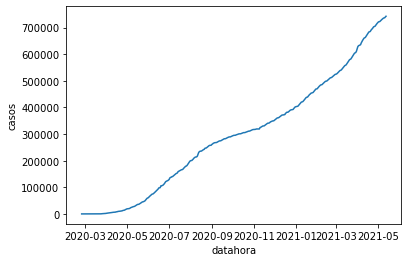

In [19]:
sns.lineplot(x="datahora", y="casos", data=dados.loc["São Paulo"])

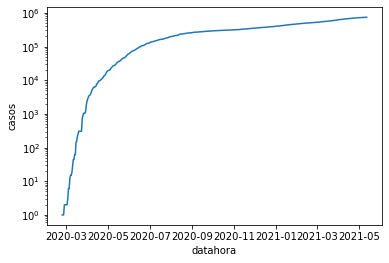

In [20]:
sns.lineplot(x="datahora",y="casos",data=dados.loc["São Paulo"])
mpl.pyplot.yscale("log")

### DESAFIO 03.01.02: Fazer a mesma análise para outro município, preferencialmente de seu estado.

In [21]:
dados.loc["Botucatu"]

,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
nome_munic,,,,,,,,,,,,,,,,,,,,,
Botucatu,3507506,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,...,Bauru,12,141135,23520,148264,0,8.0,"-22,8837","-48,4437",9
Botucatu,3507506,26,2,2020-02-26,0,0,"0,000000e+00","0,0000000",0,0,...,Bauru,12,141135,23520,148264,0,8.0,"-22,8837","-48,4437",9
Botucatu,3507506,27,2,2020-02-27,0,0,"0,000000e+00","0,0000000",0,0,...,Bauru,12,141135,23520,148264,0,8.0,"-22,8837","-48,4437",9
Botucatu,3507506,28,2,2020-02-28,0,0,"0,000000e+00","0,0000000",0,0,...,Bauru,12,141135,23520,148264,0,8.0,"-22,8837","-48,4437",9
Botucatu,3507506,29,2,2020-02-29,0,0,"0,000000e+00","0,0000000",0,0,...,Bauru,12,141135,23520,148264,0,8.0,"-22,8837","-48,4437",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Botucatu,3507506,8,5,2021-05-08,11204,41,"7,938499e+03","35,5714286",211,1,...,Bauru,12,141135,23520,148264,>5000,1.0,"-22,8837","-48,4437",18
Botucatu,3507506,9,5,2021-05-09,11214,10,"7,945584e+03","36,2857143",211,0,...,Bauru,12,141135,23520,148264,>5000,1.0,"-22,8837","-48,4437",19
Botucatu,3507506,10,5,2021-05-10,11237,23,"7,961880e+03","38,4285714",211,0,...,Bauru,12,141135,23520,148264,>5000,1.0,"-22,8837","-48,4437",19


<AxesSubplot:xlabel='datahora', ylabel='casos'>

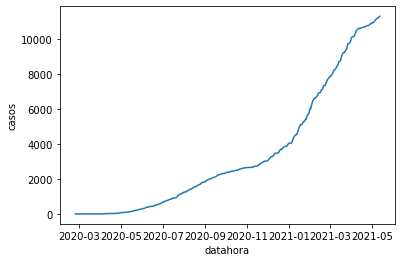

In [22]:
sns.lineplot(x="datahora", y="casos", data=dados.loc["Botucatu"])

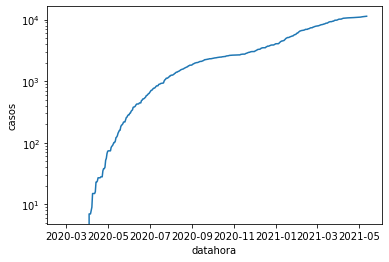

In [23]:
sns.lineplot(x="datahora",y="casos",data=dados.loc["Botucatu"])
mpl.pyplot.yscale("log")

## Aula 01 - Entendendo Série Temporal
### Parte 2 - Taxa de Crecimento e Média Móvel

<AxesSubplot:xlabel='datahora', ylabel='casos_novos'>

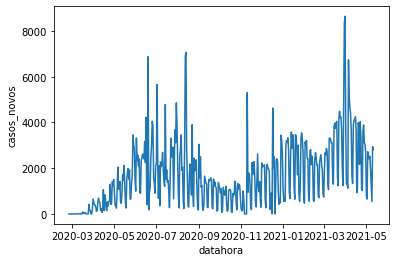

In [24]:
sns.lineplot(x='datahora', y='casos_novos', data=dados_sp)

In [25]:
dados_exemplo = pd.DataFrame(data=np.linspace(1,10,10))

In [26]:
dados_exemplo.head()

,0
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0


In [27]:
dados_exemplo['diferenciado'] = dados_exemplo.diff()

<AxesSubplot:xlabel='0', ylabel='0'>

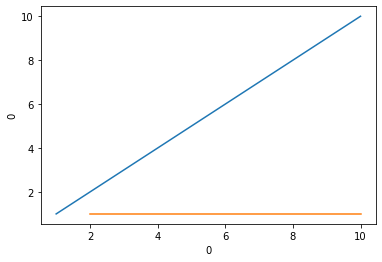

In [28]:
sns.lineplot(x=0, y=0, data=dados_exemplo)
sns.lineplot(x=0, y='diferenciado', data=dados_exemplo)

In [29]:
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()

<AxesSubplot:xlabel='datahora', ylabel='taxa_de_crescimento_casos'>

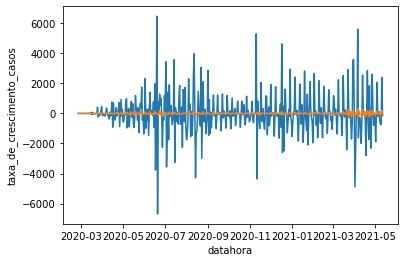

In [30]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data=dados_sp)
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data=dados_sp)

<AxesSubplot:xlabel='datahora', ylabel='taxa_de_crescimento_obitos'>

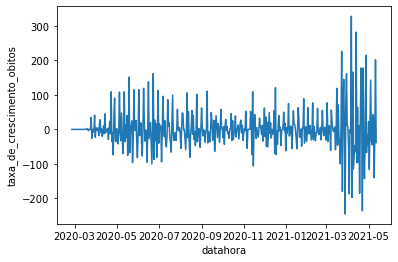

In [31]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data=dados_sp)

In [32]:
import matplotlib.pyplot as plt

<BarContainer object of 443 artists>

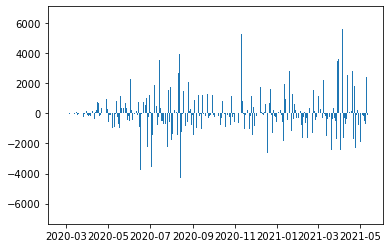

In [33]:
plt.bar(dados_sp['datahora'],dados_sp['taxa_de_crescimento_casos'])

In [34]:
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year

In [35]:
dados_2021 = dados_sp.query('ano == 2021')

<BarContainer object of 132 artists>

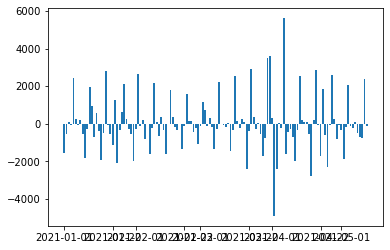

In [36]:
plt.bar(dados_2021['datahora'], dados_2021['taxa_de_crescimento_casos'])

In [37]:
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window=7,center=False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window=7,center=False).mean()

<AxesSubplot:xlabel='datahora', ylabel='casos_novos'>

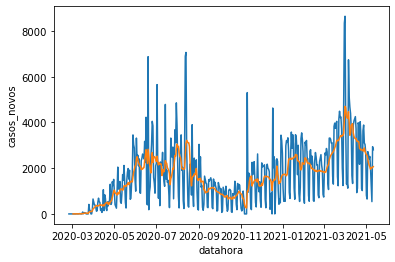

In [38]:
sns.lineplot(x='datahora',y='casos_novos', data=dados_sp)
sns.lineplot(x='datahora', y='media_movel_casos', data=dados_sp)

### DESAFIO 03.01.03: Mostrar o notebook sem os warnings

In [39]:
import warnings
warnings.filterwarnings('ignore')

### DESAFIO 03.01.04: Comparar se o pico da taxa de casos novos coincide com a taxa dos óbitos novos.

**Documentação consultada:**
- [Seaborn Axes Style](https://seaborn.pydata.org/generated/seaborn.axes_style.html#seaborn.axes_style)
- [Seaborn Set Style](https://seaborn.pydata.org/generated/seaborn.set_style.html#seaborn.set_style)

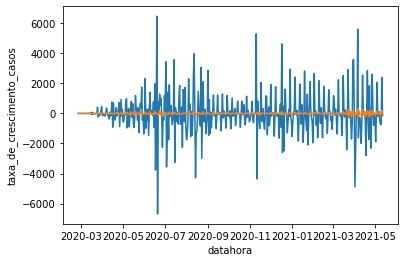

In [40]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data=dados_sp)
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data=dados_sp)
sns.set_style("darkgrid")

### DESAFIO 03.01.05: Melhorar todas as visualizações dos gráficos.


**Documentação Consultada:**
- [Matplotlib Documentation](https://matplotlib.org/stable/tutorials/introductory/usage.html)

No handles with labels found to put in legend.


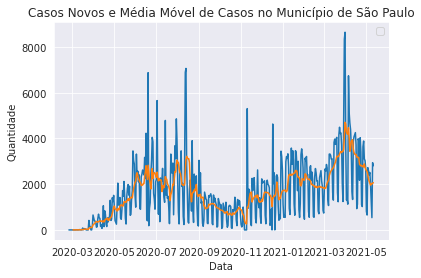

In [41]:
sns.lineplot(x='datahora',y='casos_novos', data=dados_sp)
sns.lineplot(x='datahora', y='media_movel_casos', data=dados_sp)
sns.set_style("darkgrid")
plt.xlabel("Data")
plt.ylabel("Quantidade")
plt.title("Casos Novos e Média Móvel de Casos no Município de São Paulo")
plt.legend()
plt.show()

### DESAFIO 03.01.06: Gerar o gráfico da média móvel do número de óbitos. Mudar os gráficos de casos de linha para barra.

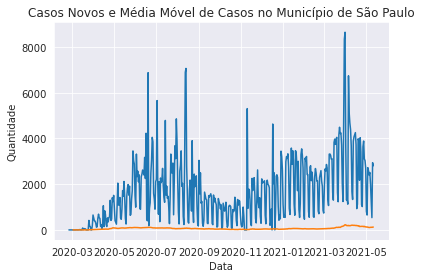

In [42]:
sns.lineplot(x='datahora',y='casos_novos', data=dados_sp)
sns.lineplot(x='datahora', y='media_movel_obitos', data=dados_sp)
sns.set_style("darkgrid")
plt.xlabel("Data")
plt.ylabel("Quantidade")
plt.title("Casos Novos e Média Móvel de Casos no Município de São Paulo")
#plt.legend()
plt.show()

In [43]:
dados_sp.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_de_crescimento_casos,taxa_de_crescimento_obitos,ano,media_movel_casos,media_movel_obitos
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,...,<50,7.0,"-23,5329","-46,6395",9,NaN,NaN,2020,NaN,NaN
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,...,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0,2020,NaN,NaN
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,...,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0,2020,NaN,NaN
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,...,<50,7.0,"-23,5329","-46,6395",9,1.0,0.0,2020,NaN,NaN
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,...,<50,7.0,"-23,5329","-46,6395",9,-1.0,0.0,2020,NaN,NaN


<BarContainer object of 443 artists>

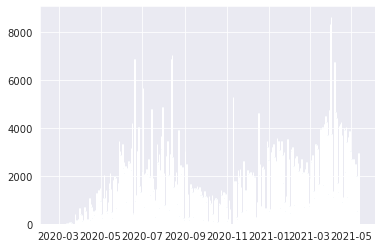

In [44]:
plt.bar(dados_sp['datahora'],dados_sp['casos_novos'])

## Aula 01 - Entendendo Série Temporal
### Parte 3 - Correlação e Função de autocorrelação

<AxesSubplot:xlabel='casos_novos', ylabel='casos_novos'>

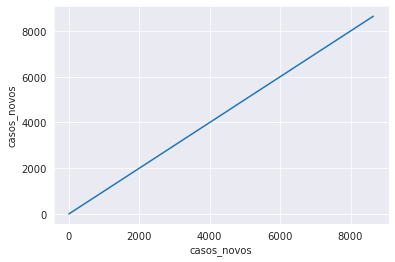

In [45]:
sns.lineplot(x='casos_novos',y='casos_novos',data=dados_sp)

<AxesSubplot:xlabel='casos_novos', ylabel='obitos_novos'>

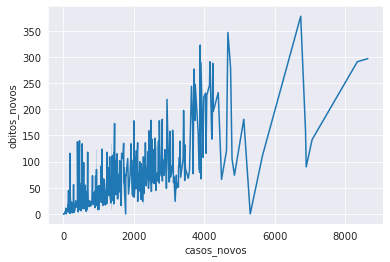

In [46]:
sns.lineplot(x='casos_novos',y='obitos_novos',data=dados_sp)

In [47]:
dados_202101 = dados_sp.query('mes == 1 & ano == 2021')
dados_202102 = dados_sp.query('mes == 2 & ano == 2021')

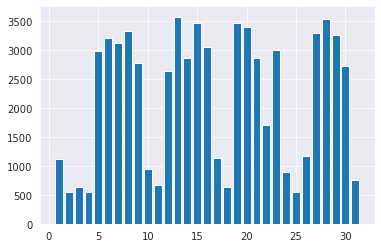

<BarContainer object of 28 artists>

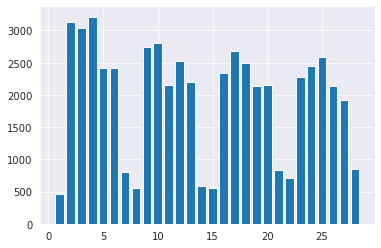

In [48]:
plt.bar(np.linspace(1,31,31),dados_202101['casos_novos'])
plt.show()
plt.bar(np.linspace(1,28,28),dados_202102['casos_novos'])

**Função de autocorrelação para identificar sazonalidade:**

- Identifica se existe dependência temporal;
- Em valores aleatórios não existe dependência temporal, como se pode ver no segundo gráfico a seguir.

In [49]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

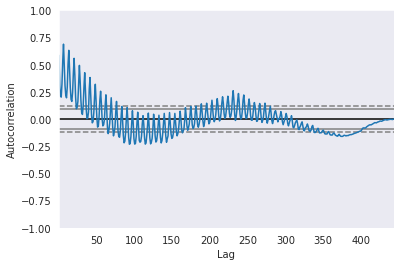

In [50]:
autocorrelation_plot(dados_sp['casos_novos'])

In [51]:
dados_sp.shape

(443, 31)

In [52]:
aleatorio = np.random.rand(443)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

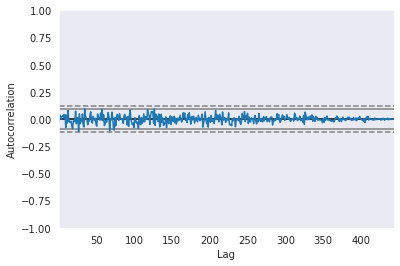

In [53]:
autocorrelation_plot(aleatorio)

### DESAFIO 03.01.07: Mover o número de obitos alguns dias para verificar se a relação entre os casos novos e os óbitos. Teste diferentes janelas de tempo (3 dias, 7 dias, 14 dias)



In [54]:
dados_sp_90dias = dados_sp[90:]
dados_sp_90dias

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_de_crescimento_casos,taxa_de_crescimento_obitos,ano,media_movel_casos,media_movel_obitos
58612,São Paulo,3550308,25,5,2020-05-25,46204,677,"3,892614e+02","1430,8571429",3555,...,>5000,1.0,"-23,5329","-46,6395",22,37.0,-22.0,2020,1430.857143,99.857143
59257,São Paulo,3550308,26,5,2020-05-26,47554,1350,"4,006349e+02","1416,2857143",3691,...,>5000,1.0,"-23,5329","-46,6395",22,673.0,115.0,2020,1416.285714,94.571429
59902,São Paulo,3550308,27,5,2020-05-27,49264,1710,"4,150414e+02","1399,7142857",3826,...,>5000,1.0,"-23,5329","-46,6395",22,360.0,-1.0,2020,1399.714286,98.714286
60547,São Paulo,3550308,28,5,2020-05-28,52719,3455,"4,441492e+02","1609,7142857",3958,...,>5000,1.0,"-23,5329","-46,6395",22,1745.0,-3.0,2020,1609.714286,102.857143
61192,São Paulo,3550308,29,5,2020-05-29,55741,3022,"4,696091e+02","1824,0000000",4116,...,>5000,1.0,"-23,5329","-46,6395",22,-433.0,26.0,2020,1824.000000,109.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283072,São Paulo,3550308,8,5,2021-05-08,735057,1998,"6,192738e+03","1956,5714286",28309,...,>5000,1.0,"-23,5329","-46,6395",18,-515.0,35.0,2021,1956.571429,114.571429
283717,São Paulo,3550308,9,5,2021-05-09,736342,1285,"6,203564e+03","2024,1428571",28347,...,>5000,1.0,"-23,5329","-46,6395",19,-713.0,-140.0,2021,2024.142857,116.714286
284362,São Paulo,3550308,10,5,2021-05-10,736880,538,"6,208097e+03","2008,1428571",28364,...,>5000,1.0,"-23,5329","-46,6395",19,-747.0,-21.0,2021,2008.142857,114.142857
285007,São Paulo,3550308,11,5,2021-05-11,739821,2941,"6,232874e+03","2039,1428571",28583,...,>5000,1.0,"-23,5329","-46,6395",19,2403.0,202.0,2021,2039.142857,120.000000


<AxesSubplot:xlabel='casos_novos', ylabel='obitos_novos'>

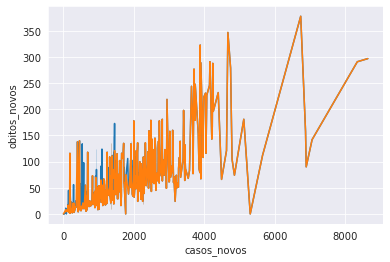

In [55]:
sns.lineplot(x='casos_novos',y='obitos_novos',data=dados_sp)
#sns.lineplot(x=dados_sp['casos_novos'],y=dados_sp_7dias['obitos_novos'])
sns.lineplot(x=dados_sp['casos_novos'],y=dados_sp_90dias['obitos_novos'])

### DESAFIO 03.01.08: Calcular a função de autocorrelação cruzada dos óbitos e casos. (teste a biblioteca statsmodels)


**Documentação consultada:**
- [Statsmodels Instalation](https://www.statsmodels.org/stable/install.html)
- [Statsmodels Calculate the autocorrelation function](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.acf.html)
- [Statsmodels Autocorrelation - Plot autocorrelation function](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html)
- [Statsmodels Autocorrelation - Plot partial autocorrelation function](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html)
- [Two variables Autocorrelation Statsmodels Article](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/)

In [56]:
import statsmodels.api as sm

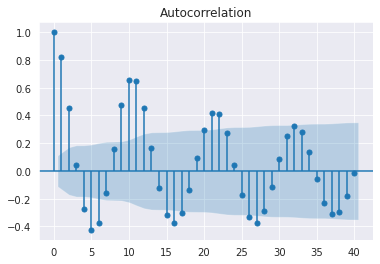

In [57]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]
sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags = 40)
plt.show()

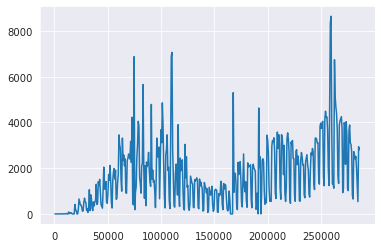

In [58]:
serie_casos_novos_sp = dados_sp['casos_novos']
serie_casos_novos_sp.plot()
plt.show()

### DESAFIO 03.01.07: Mover o número de obitos alguns dias para verificar se a relação entre os casos novos e os óbitos. Teste diferentes janelas de tempo (3 dias, 7 dias, 14 dias)
### DESAFIO 03.01.08: Calcular a função de autocorrelação cruzada dos óbitos e casos. (teste a biblioteca statsmodels)
### DESAFIO 03.01.09: Estudar todos esses padrões para outro município e comparar com o município de São Paulo.

### O que aprendemos?

## AULA 02 - Primeiras previsões com o Prophet

**Preparando para forcast com o Prophet.**
**Documentação consultada:**
- [Pip Install fbprophet](https://pypi.org/project/fbprophet/)
- [Prophet QuickStart](https://facebook.github.io/prophet/docs/quick_start.html)


In [59]:
df = pd.DataFrame()

In [60]:
df['ds'] = dados_sp['datahora'][:400]

In [61]:
df['y'] = dados_sp['casos_novos'][:400]

In [62]:
dados_sp.shape

(443, 31)

In [63]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [64]:
modelo = Prophet()

In [65]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [66]:
dataframefuturo = modelo.make_future_dataframe(periods=43)

In [67]:
dataframefuturo.head()

,ds
0,2020-02-25
1,2020-02-26
2,2020-02-27
3,2020-02-28
4,2020-02-29


In [68]:
previsao = modelo.predict(dataframefuturo)

In [69]:
previsao.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,-144.473695,-703.122773,1353.705822,-144.473695,-144.473695,458.701931,458.701931,458.701931,458.701931,458.701931,458.701931,0.0,0.0,0.0,314.228236
1,2020-02-26,-126.671483,-701.859617,1410.639311,-126.671483,-126.671483,458.079045,458.079045,458.079045,458.079045,458.079045,458.079045,0.0,0.0,0.0,331.407562
2,2020-02-27,-108.869271,-499.071541,1582.707656,-108.869271,-108.869271,597.622320,597.622320,597.622320,597.622320,597.622320,597.622320,0.0,0.0,0.0,488.753049
3,2020-02-28,-91.067059,-826.401734,1359.041261,-91.067059,-91.067059,341.665155,341.665155,341.665155,341.665155,341.665155,341.665155,0.0,0.0,0.0,250.598096
4,2020-02-29,-73.264847,-1124.100499,1135.774451,-73.264847,-73.264847,59.273342,59.273342,59.273342,59.273342,59.273342,59.273342,0.0,0.0,0.0,-13.991505


In [70]:
df_teste = pd.DataFrame()
df_teste['ds'] = dados_sp['datahora'][400:]
df_teste['y'] = dados_sp['casos_novos'][400:]

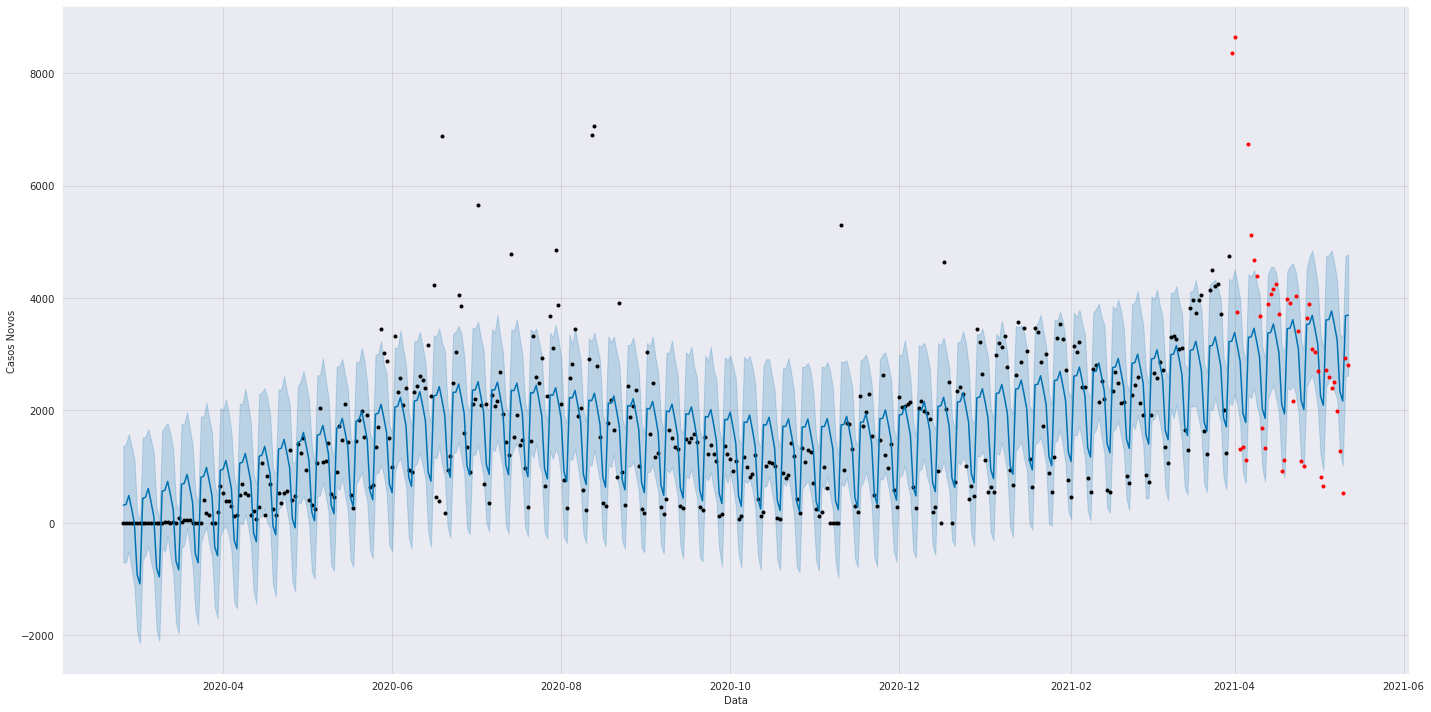

In [71]:
modelo.plot(previsao, xlabel = 'Data', ylabel='Casos Novos', figsize=(20,10));
plt.plot(df_teste['ds'],df_teste['y'],'.r')

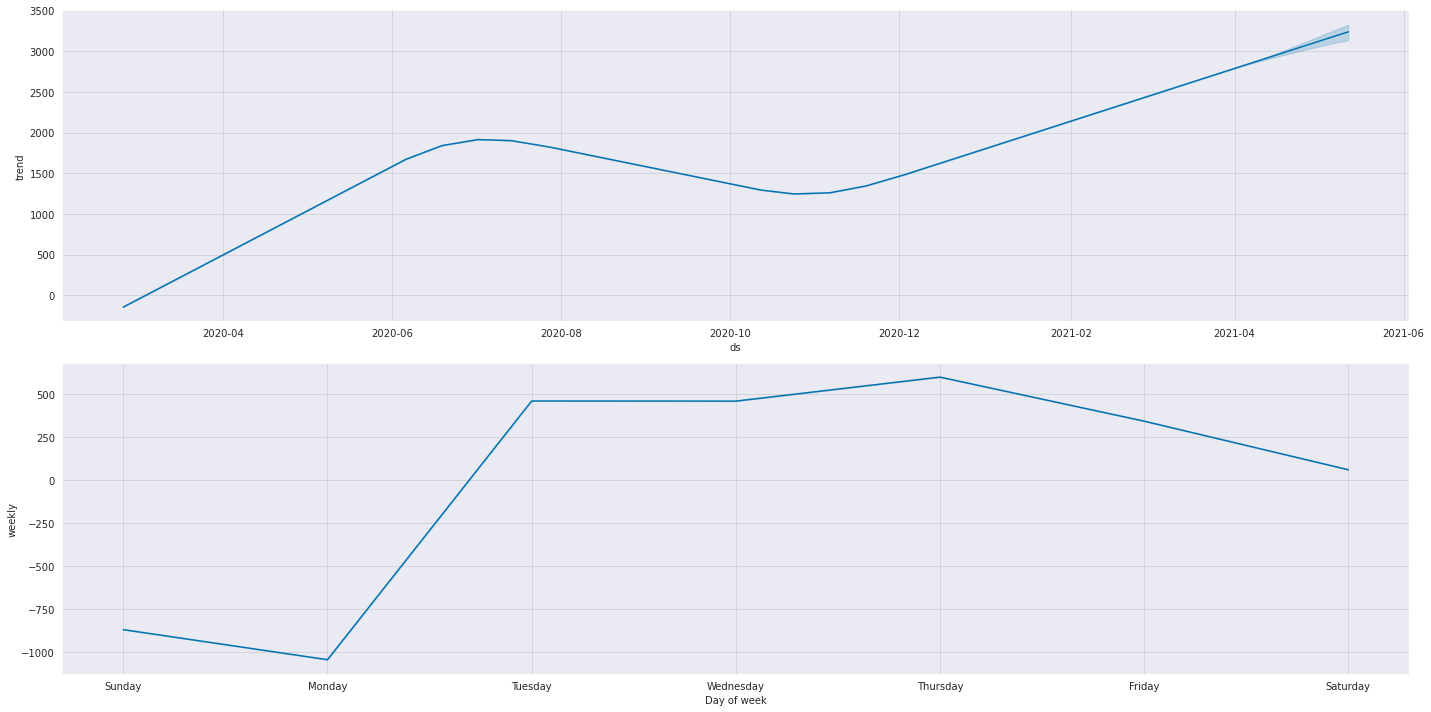

In [73]:
modelo.plot_components(previsao, figsize=(20,10));

### DESAFIO 08: Mudar os períodos de previsão. Testar vários números de dias e ver os resultados de previsão.

### DESAFIO 09: Checar a documentação do Prophet e o repositório do GitHub desse projeto. Checar particularmente o "Quick Start". Melhorar os gráficos: incluir títulos, nomes dos eixos, indicações dos ticks de inglês para português.

### DESAFIO 10: Fazer todo o processo de previsão para o número de casos acumulados.

### O que aprendemos?